In [ ]:
%reload_ext autoreload

In [ ]:
%autoreload 2

In [ ]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib
from scipy import stats
from sklearn.impute import SimpleImputer

from analysis import *

In [ ]:
# script to consolidate all HCCDB data into one dataframe

hccdb_names = ["1", "3", "4",  "8", "9", "11", "12", "13", "14", "16", "17", "18"]
hccdb = pd.DataFrame()

for i in range(len(hccdb_names)):
    n1, n2 = construct_hccdb_filename(hccdb_names[i])
    hccdb_temp = get_hccdb_data(n1)
    hccdb_temp = hccdb_temp.loc[~hccdb_temp.index.duplicated(),:].copy()
    hccdb_temp.loc["ptype",:] = "HCCDB-" + hccdb_names[i]
    hccdb = pd.concat([hccdb, hccdb_temp], axis = 1) # patients x genes

# load pancan data

tcga = pd.read_csv("./data/EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp (1).xena", index_col = 0, sep = "\t") # gene x patient
pheno = pd.read_csv("./data/TCGA_phenotype_denseDataOnlyDownload (1).tsv", index_col = 0, sep = "\t") # patient x phenotype

# attach cancer type to each patient
data = tcga.T
data = pd.concat([data, pheno], axis = 1, join = "inner") # patients x genes
    
print(data.shape)
print(tcga.T.shape)

# attach abbeviations for each cancer type
ls = data["_primary_disease"].unique().tolist()

conditions = [
    data['_primary_disease'] == 'adrenocortical cancer',
    data['_primary_disease'] == 'bladder urothelial carcinoma',
    data['_primary_disease'] == 'breast invasive carcinoma',
    data['_primary_disease'] == 'cervical & endocervical cancer',
    data['_primary_disease'] == 'cholangiocarcinoma', 
    data['_primary_disease'] == 'colon adenocarcinoma',
    data['_primary_disease'] == 'diffuse large B-cell lymphoma',
    data['_primary_disease'] == 'esophageal carcinoma',
    data['_primary_disease'] == 'glioblastoma multiforme',
    data['_primary_disease'] == 'head & neck squamous cell carcinoma',
    data['_primary_disease'] == 'kidney chromophobe',
    data['_primary_disease'] == 'kidney clear cell carcinoma',
    data['_primary_disease'] == 'kidney papillary cell carcinoma',
    data['_primary_disease'] == 'acute myeloid leukemia',
    data['_primary_disease'] == 'brain lower grade glioma',
    data['_primary_disease'] == 'liver hepatocellular carcinoma',
    data['_primary_disease'] == 'lung adenocarcinoma',
    data['_primary_disease'] == 'lung squamous cell carcinoma',
    data['_primary_disease'] == 'mesothelioma',
    data['_primary_disease'] == 'ovarian serous cystadenocarcinoma',
    data['_primary_disease'] == 'pancreatic adenocarcinoma',
    data['_primary_disease'] == 'pheochromocytoma & paraganglioma',
    data['_primary_disease'] == 'prostate adenocarcinoma',
    data['_primary_disease'] == 'rectum adenocarcinoma',
    data['_primary_disease'] == 'sarcoma',
    data['_primary_disease'] == 'skin cutaneous melanoma',
    data['_primary_disease'] == 'stomach adenocarcinoma',
    data['_primary_disease'] == 'testicular germ cell tumor',
    data['_primary_disease'] == 'thyroid carcinoma',
    data['_primary_disease'] == 'thymoma',
    data['_primary_disease'] == 'uterine corpus endometrioid carcinoma',
    data['_primary_disease'] == 'uterine carcinosarcoma',
    data['_primary_disease'] == 'uveal melanoma'    
]

choices = ["ACC",
           "BLCA",
           "BRCA",
           "CESC",
           "CHOL",
           "COAD",
           "DBLC",
           "ESCA",
           "GBM",
           "HNSC",
           "KICH",
           "KIRC",
           "KIRP",
           "LAML",
           "LGG",
           "LIHC",
           "LUAD",
           "LUSC",
           "MESO",
           "OV",
           "PAAD",
           "PCPG",
           "PRAD",
           "READ",
           "SARC",
           "SKCM",
           "STAD",
           "TGCT",
           "THCA",
           "THYM",
           "UCEC",
           "UCS",
           "UVM"
           ]

data["ptype"] = np.select(conditions, choices, default = "null")
data.head()


In [ ]:
# # single gene screen
# # RRM2B vs NRF2 genes

# gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
# x_set = gene_set['p53 new'].dropna().tolist()
# y_set = gene_set['NRF2_final'].dropna().tolist()

# targets = list(set(["G6PD", "RRM2B"] +  x_set + y_set))

# r_all =[]
# p_all = []

# databases = ['HNSC', 'SARC', 'LUSC', 'UCS', 'STAD', 'LAML', 'PRAD', 'PAAD', 'BRCA', 'DBLC', 'SKCM', 'OV', 'ESCA'] # , , 'PANCAN'


# genes =['CAT', 'PRDX1', 'PRDX6', 'GPX2', 'GSR', 
#         'SLC6A9', 'TXN', 'SRXN1', 'G6PD', 'IDH1', 
#         'ME1', 'PGD', 'AKR1B10', 'AKR1C1', 'ALDH3A1', 
#         'CBR1', 'EPHX1', 'NQO1', 'NQO2', 'PTGR1', 
#         'UGT1A6', 'GSTA1', 'GSTA2', 'GSTA3', 'GSTA4', 
#         'GSTA5', 'GSTM1', 'GSTM2', 'GSTM3', 'GSTP1' ]

# for db in databases:
    
#     # load data
#     df = data[data["ptype"] == db]
#     df = df.T # genes x patients
#     df.drop(["ptype","sample_type_id", "sample_type", "_primary_disease"], inplace = True)

#     # define subplot grid
#     fig, axs = plt.subplots(5, 6, figsize=(50, 30))
#     plt.subplots_adjust(hspace=0.6, wspace = 0.4)
#     fig.suptitle('Single gene comparison ' + db + " (n = " + str(df.shape[1]) + ")",fontsize = 40)

#     rtemp = [db]
#     ptemp = [db]
#     print(db)
    
#     for g, ax in zip(genes, axs.ravel()):
#         try:
#             print(g)
#             data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = None, pheno_filtered=None)
#             r,p=r, p = analyse(data_new, fig, "RRM2B vs " + g , ax, 'RRM2B-genes-selected' + db + '.png', x_label = "RRM2B", y_label = g, x_target = 'RRM2B', y_target = g )
#             rtemp.append(r)
#             ptemp.append(p)

#         except KeyError:
#             print("key error")
#             continue

#     r_all.append(rtemp)
#     p_all.append(ptemp)
    
# print("done")

# df_r = pd.DataFrame(r_all, columns = ["database"] + genes)
# df_p = pd.DataFrame(p_all, columns = ["database"] + genes)
# df_r.to_csv("r values RRM2B-genes-selected.csv")
# df_p.to_csv("p values RRM2B-genes-selected.csv")


In [ ]:
# # single gene screen
# # p53 sig vs NRF2 genes

# gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
# x_set = gene_set['p53 new'].dropna().tolist()
# y_set = gene_set['NRF2_final'].dropna().tolist()

# targets = list(set(["G6PD", "RRM2B"] +  x_set + y_set))

# r_all =[]
# p_all = []

# databases = ['HNSC', 'SARC', 'LUSC', 'UCS', 'STAD', 'LAML', 'PRAD', 'PAAD', 'BRCA'] # , , 'PANCAN'


# genes =['CAT', 'PRDX1', 'PRDX6', 'GPX2', 'GSR', 
#         'SLC6A9', 'TXN', 'SRXN1', 'G6PD', 'IDH1', 
#         'ME1', 'PGD', 'AKR1B10', 'AKR1C1', 'ALDH3A1', 
#         'CBR1', 'EPHX1', 'NQO1', 'NQO2', 'PTGR1', 
#         'UGT1A6', 'GSTA1', 'GSTA2', 'GSTA3', 'GSTA4', 
#         'GSTA5', 'GSTM1', 'GSTM2', 'GSTM3', 'GSTP1' ]

# for db in databases:

#     # load data
#     df = data[data["ptype"] == db]
#     df = df.T # genes x patients
#     df.drop(["ptype","sample_type_id", "sample_type", "_primary_disease"], inplace = True)

#     # define subplot grid
#     fig, axs = plt.subplots(5, 6, figsize=(50, 30))
#     plt.subplots_adjust(hspace=0.6, wspace = 0.4)
#     fig.suptitle('Single gene comparison ' + db + " (n = " + str(df.shape[1]) + ")",fontsize = 40)

#     rtemp = [db]
#     ptemp = [db]
#     print(db)
    
#     for g, ax in zip(genes, axs.ravel()):
#         try:
#             print(g)
#             data_new = process_data(df, targets, x_var_names = x_set, y_var_names = None, pheno_filtered=None)
#             r,p=r, p = analyse(data_new, fig, "p53 sig vs " + g , ax, 'p53sig-genes-selected' + db + '.png', x_label = "p53 signature", y_label = g, x_target = 'x_composite_score', y_target = g )
#             rtemp.append(r)
#             ptemp.append(p)
#         except KeyError:
#             print("key error")
#             continue

#     r_all.append(rtemp)
#     p_all.append(ptemp)
    
# print("done")

# df_r = pd.DataFrame(r_all, columns = ["database"] + genes)
# df_p = pd.DataFrame(p_all, columns = ["database"] + genes)
# df_r.to_csv("r values p53sig-genes-selected.csv")
# df_p.to_csv("p values p53sig-genes-selected.csv")


PANCAN
CAT


ValueError: Found array with 0 sample(s) (shape=(0, 53)) while a minimum of 1 is required by SimpleImputer.

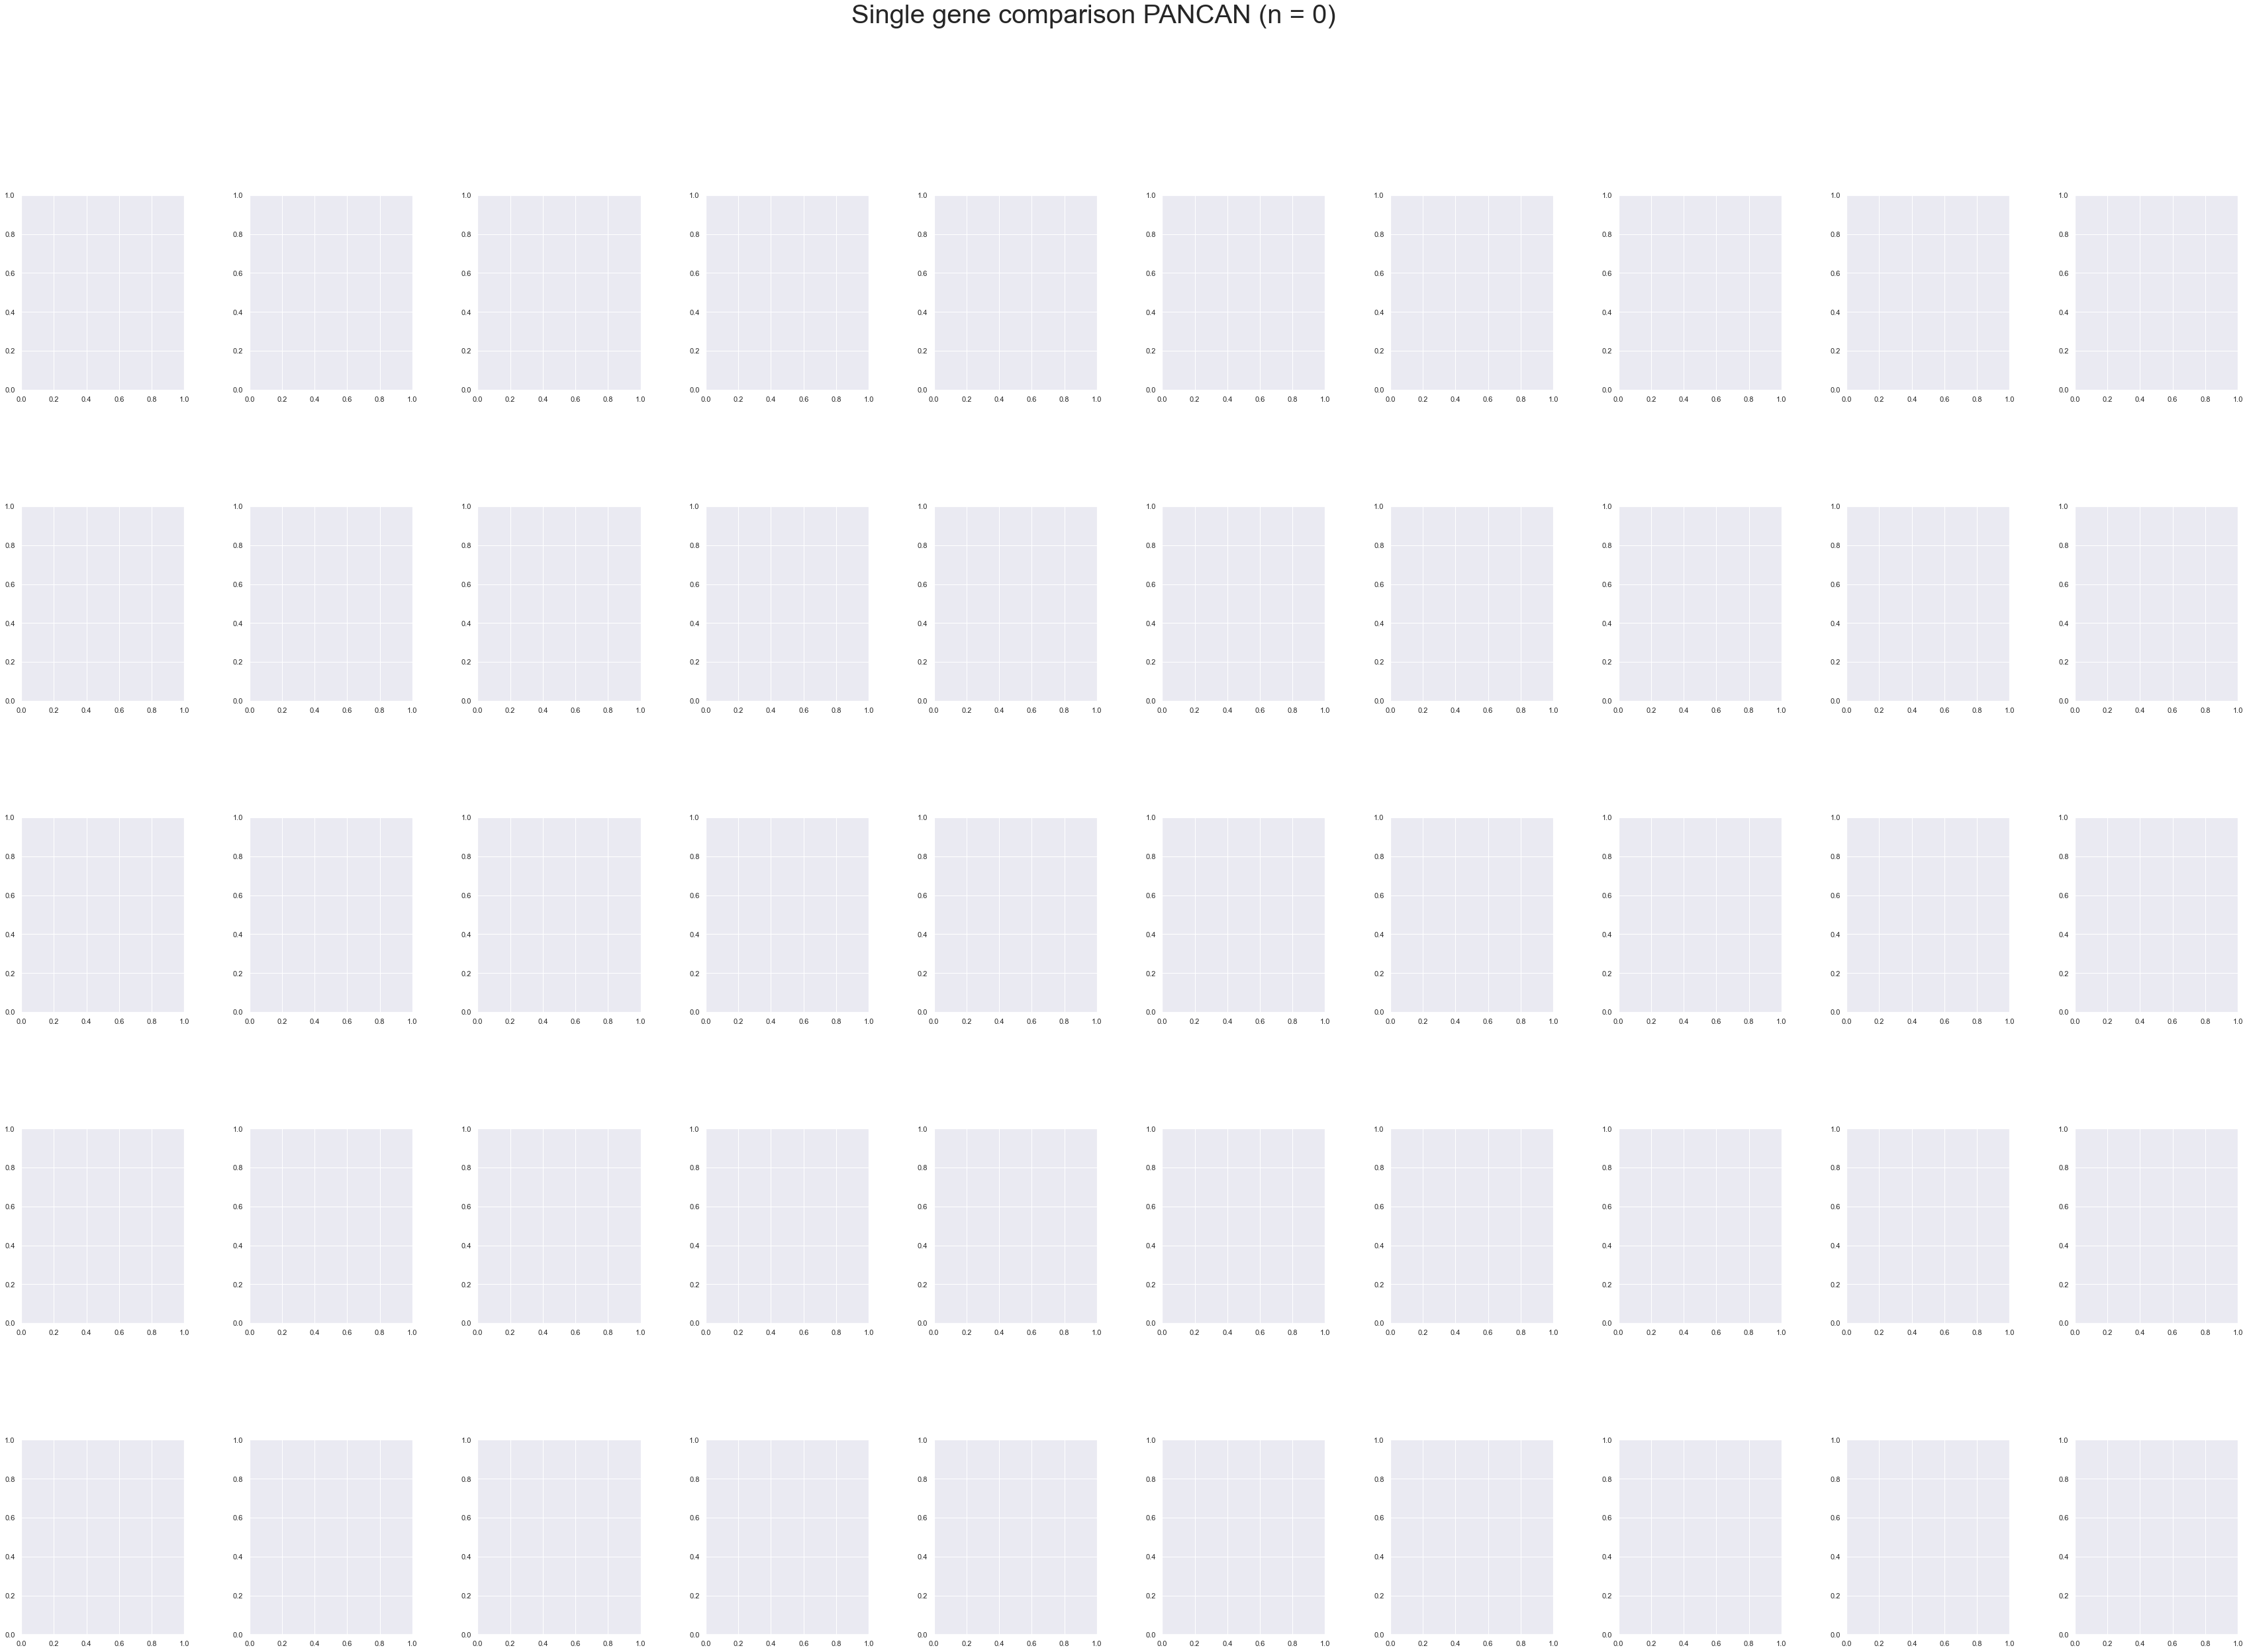

In [16]:
# single gene screen
# RRM2B vs AOS genes

gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
x_set = gene_set['p53 new'].dropna().tolist()
genes = gene_set['AOS_final'].dropna().tolist()
targets = list(set(["G6PD", "RRM2B"] +  x_set + genes))

r_all =[]
p_all = []

databases = ['PANCAN'] # , , 'PANCAN', 'HNSC', 'SARC', 'LUSC', 'UCS', 'STAD', 'LAML', 'PRAD', 'PAAD', 'BRCA', 'DBLC', 'SKCM', 'OV', 'ESCA'



for db in databases:
    
    # load data
    df = get_data(data, hccdb=None, db=db)

    # define subplot grid
    fig, axs = plt.subplots(5, 10, figsize=(60, 40))
    plt.subplots_adjust(hspace=0.6, wspace = 0.4)
    fig.suptitle('Single gene comparison ' + db + " (n = " + str(df.shape[1]) + ")",fontsize = 40)

    rtemp = [db]
    ptemp = [db]
    print(db)
    
    for g, ax in zip(genes, axs.ravel()):
        try:
            print(g)
            data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = None, pheno_filtered=None)
            r,p=r, p = analyse(data_new, fig, "RRM2B vs " + g , ax, 'AOS-genes-screen' + db + '.png', x_label = "RRM2B", y_label = g, x_target = 'RRM2B', y_target = g )
            rtemp.append(r)
            ptemp.append(p)

        except KeyError:
            print("key error")
            continue

    r_all.append(rtemp)
    p_all.append(ptemp)
    
print("done")

df_r = pd.DataFrame(r_all, columns = ["database"] + genes)
df_p = pd.DataFrame(p_all, columns = ["database"] + genes)
df_r.to_csv("r values AOS-genes-screen-PANCAN.csv")
df_p.to_csv("p values AOS-genes-screen-PANCAN.csv")
